## Sources:
- https://github.com/krishnaik06/Advanced-House-Price-Prediction-

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Functions

In [2]:
def convertBool(lst):
    for index in range(len(lst)):
        if pd.isnull(lst[index]) or not lst[index]:
            lst[index] = 0
        else:
            lst[index] = 1

    return lst

In [46]:
def findCorrelation(x_label, y_label):
    # Rescale data 
    ss = StandardScaler()
    ss2 = StandardScaler()

    x = df[x_label].tolist()
    m = np.mean(df[x_label].dropna().tolist())
    x = np.array([m if pd.isnull(ele) else ele for ele in x])
    y = np.array(df[y_label].tolist())
    
    print(np.corrcoef(x, y))

    x = ss.fit_transform(x.reshape(-1,1))
    y = ss2.fit_transform(y.reshape(-1,1))
    
    # Plot
    plt.figure(figsize=(4,4))
    plt.xlim([-30,20])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x, y)

## Testing

### TODO

- scale values
    - mileage
    - fuel_tank_volume
    - etc.
    
- encode/bin categorical variables (encode using sklearn label encoder)
    - exterior_color
    - make_name
    - model_name
    - etc.

- parse dates to just yrs?

- check distributions of categorical variables

Possibly useful attributes:
- body_type
- days_on_market
- body_type
- engine_cylinders
- engine_type
- frame_damaged
- fuel_type
- has_accidents
- horsepower
- is_new
- is_oemcpo
- listed_date
- mileage
- make_name
- model_name
- fuel_tank_volume
- owner_count
- salvage
- wheel_system
- exterior_color
- year

Reading in File

In [2]:
begin = time.time()
df = pd.read_csv('used_cars_data.csv')
end = time.time()

print("Time taken: ", end - begin)

/var/folders/kb/75nzr_1n56s5_rw0zrhwqhp00000gn/T/ipykernel_6554/4037307831.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('used_cars_data.csv')


Time taken:  180.83740162849426


In [3]:
df.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


Preprocessing

In [51]:
# Remove rows with duplicate vehicle id numbers

df = df.drop_duplicates(subset=["vin"])

In [7]:
# Convert columns to 0's or 1's

has_acc = df["has_accidents"].tolist()
salvage = df["salvage"].tolist()

_ = convertBool(salvage)
_ = convertBool(has_acc)

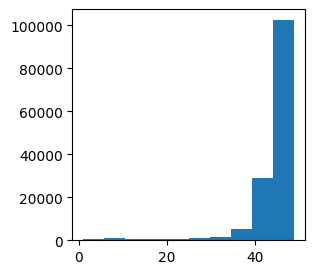

In [8]:
# Modify yr column

startYear = 1960
endYear = 2010

# Preprocess years
yrs = df["year"].tolist()
yrs = list(filter(lambda x: x < 2010, yrs))
yrs = list(map(lambda x: x - startYear, yrs))
yrs = list(filter(lambda x: x > 0, yrs))

# Plot
plt.figure(figsize=(3,3))
plt.hist(yrs);

In [10]:
# Printing out shapes of dataframe with increasing percentage thresholds of non-NaN values

# for i in range(1, 11):
#     percent = 0.1 * i
#     thresh = int(df.shape[0] * percent)
#     df_ = df.dropna(axis=1, thresh=thresh)
#     print(df_.shape)

Data Exploration

[[1.         0.56760544]
 [0.56760544 1.        ]]


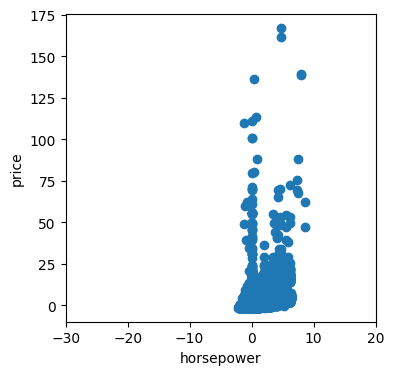

In [52]:
findCorrelation("horsepower", "price")

[[ 1.         -0.26712504]
 [-0.26712504  1.        ]]


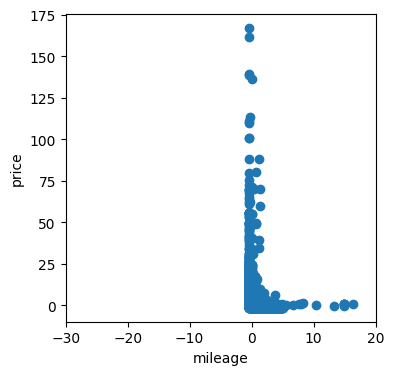

In [53]:
findCorrelation("mileage", "price")

[[1.         0.06328947]
 [0.06328947 1.        ]]


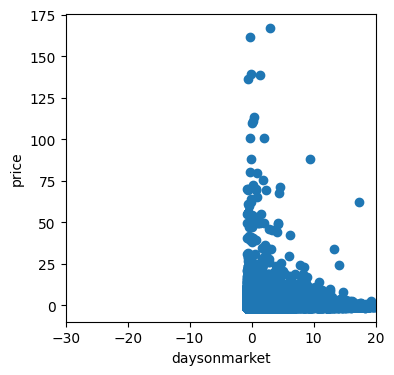

In [54]:
findCorrelation("daysonmarket", "price")

[[1.         0.35536439]
 [0.35536439 1.        ]]


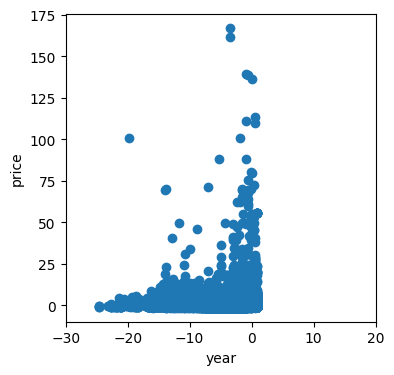

In [55]:
findCorrelation("year", "price")

[[1.         0.35204962]
 [0.35204962 1.        ]]


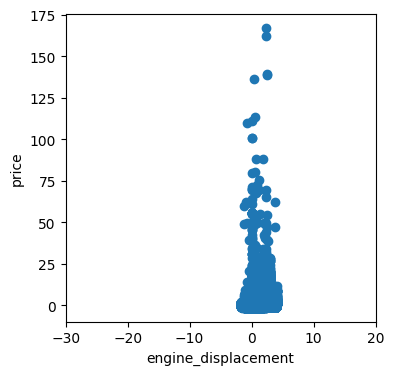

In [56]:
findCorrelation("engine_displacement", "price")

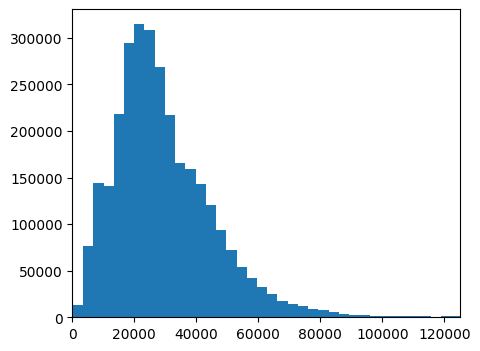

In [50]:
# Exploring range of prices in bins of 1000

plt.figure(figsize=(5,4))
plt.xlim(0,125000)
plt.hist(df["price"], bins=1000);

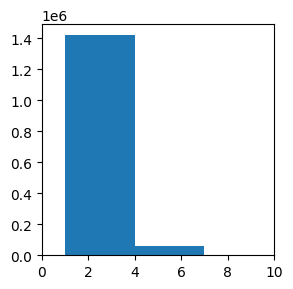

In [97]:
#Exploring owner count feature

plt.figure(figsize=(3,3))
plt.xlim([0,10])
plt.hist(df["owner_count"], 6);

In [79]:
# Explore make name

set(df["make_name"].tolist())

{'AM General',
 'AMC',
 'Acura',
 'Alfa Romeo',
 'Allard',
 'Ariel',
 'Aston Martin',
 'Audi',
 'Austin',
 'Austin-Healey',
 'BMW',
 'Bentley',
 'Bricklin',
 'Bugatti',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Clenet',
 'Daewoo',
 'Datsun',
 'DeLorean',
 'DeSoto',
 'DeTomaso',
 'Dodge',
 'Eagle',
 'Edsel',
 'FIAT',
 'Ferrari',
 'Fisker',
 'Ford',
 'Franklin',
 'Freightliner',
 'GMC',
 'Genesis',
 'Geo',
 'Hillman',
 'Honda',
 'Hudson',
 'Humber',
 'Hummer',
 'Hyundai',
 'INFINITI',
 'International Harvester',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Jensen',
 'Kaiser',
 'Karma',
 'Kia',
 'Koenigsegg',
 'Lamborghini',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'MG',
 'MINI',
 'Maserati',
 'Maybach',
 'Mazda',
 'McLaren',
 'Mercedes-Benz',
 'Mercury',
 'Mitsubishi',
 'Mobility Ventures',
 'Morris',
 'Nash',
 'Nissan',
 'Oldsmobile',
 'Opel',
 'Packard',
 'Pagani',
 'Pininfarina',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'RAM',
 'Rolls-Royce',
 'Rover',
 'SRT',
 'Saab',
 'Saleen',
 'S

(array([2.598436e+06, 4.445200e+04, 2.585500e+04, 0.000000e+00,
        1.559930e+05, 1.641600e+04, 0.000000e+00, 7.601200e+04,
        1.460000e+02, 6.000000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

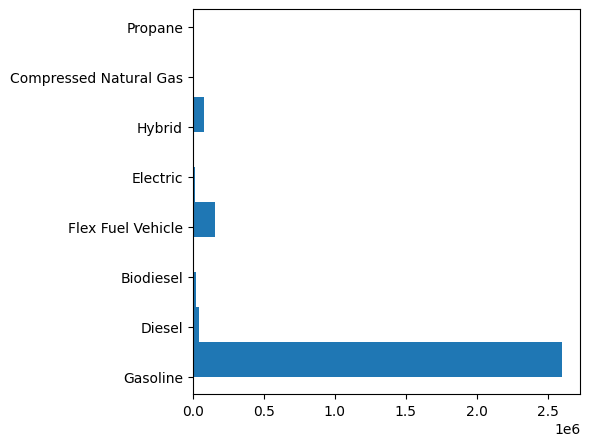

In [112]:
# Explore fuel type

fuel_type = df["fuel_type"].tolist()
fuel_type = list(filter(lambda x: not pd.isnull(x) ,fuel_type))

plt.figure(figsize=(5,5))
plt.hist(fuel_type, align='mid', orientation='horizontal')

In [21]:
# Printing out data types of each column

col_dtypes = dict()
for col in df.columns:
    cur_col = df[col]
    
    for i in range(len(cur_col)):
        if not pd.isnull(cur_col[i]):
            col_dtypes[col] = type(cur_col[i])
            break

for key in col_dtypes.keys():
    print(key, " ", str(col_dtypes[key]))

vin   <class 'str'>
back_legroom   <class 'str'>
bed   <class 'str'>
bed_height   <class 'str'>
bed_length   <class 'str'>
body_type   <class 'str'>
cabin   <class 'str'>
city   <class 'str'>
city_fuel_economy   <class 'numpy.float64'>
daysonmarket   <class 'numpy.int64'>
dealer_zip   <class 'int'>
description   <class 'str'>
engine_cylinders   <class 'str'>
engine_displacement   <class 'numpy.float64'>
engine_type   <class 'str'>
exterior_color   <class 'str'>
fleet   <class 'bool'>
frame_damaged   <class 'bool'>
franchise_dealer   <class 'numpy.bool_'>
franchise_make   <class 'str'>
front_legroom   <class 'str'>
fuel_tank_volume   <class 'str'>
fuel_type   <class 'str'>
has_accidents   <class 'bool'>
height   <class 'str'>
highway_fuel_economy   <class 'numpy.float64'>
horsepower   <class 'numpy.float64'>
interior_color   <class 'str'>
isCab   <class 'bool'>
is_cpo   <class 'bool'>
is_new   <class 'numpy.bool_'>
is_oemcpo   <class 'bool'>
latitude   <class 'numpy.float64'>
length   <